<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-capeju/blob/main/TecMty_Regresion_lineal_polinomial_A01793931.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maestría en Inteligencia Artificial Aplicada

Ciencia y Analítica de Datos

Tecnológico de Monterrey

**Alumno:** Carlos Jesús Peñaloza Julio -- A01793931

**Profesora:** María de la Paz Rico Fernández

**Fecha de entrega:** Noviembre 9 de 2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [57]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics, linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [58]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [59]:
np.random.rand(100, 1)

array([[0.90556308],
       [0.90893773],
       [0.02359845],
       [0.40293213],
       [0.64790994],
       [0.46843257],
       [0.81390103],
       [0.80746461],
       [0.14071283],
       [0.33193806],
       [0.78709185],
       [0.78139456],
       [0.67406007],
       [0.43091391],
       [0.97403319],
       [0.72306901],
       [0.54284557],
       [0.00955456],
       [0.75265578],
       [0.61866274],
       [0.60899417],
       [0.72662087],
       [0.43004887],
       [0.96683575],
       [0.4409505 ],
       [0.78746931],
       [0.35171743],
       [0.44687922],
       [0.71118926],
       [0.02175221],
       [0.44425935],
       [0.9056292 ],
       [0.15663829],
       [0.04257653],
       [0.47824406],
       [0.91491893],
       [0.6886593 ],
       [0.69974475],
       [0.0044667 ],
       [0.19384119],
       [0.94028728],
       [0.75527621],
       [0.37863415],
       [0.93562125],
       [0.10609374],
       [0.89351595],
       [0.2687336 ],
       [0.987

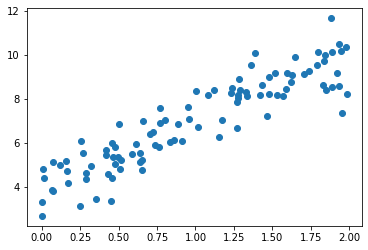

In [60]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [61]:
import pandas as pd
pd.DataFrame(y)

,0
0,5.977405
1,6.719591
2,6.142157
3,8.238270
4,5.365414
...,...
95,3.868151
96,4.951932
97,10.109046
98,10.388818


In [62]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [63]:
#X_fit[]

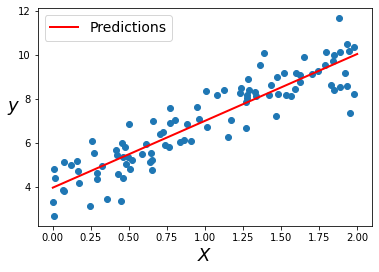

In [64]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [65]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [66]:
X_new.shape

(2, 1)

In [67]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.98336294],
       [10.05437677]])

In [68]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.03550692]]), array([3.98336294]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [69]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [70]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

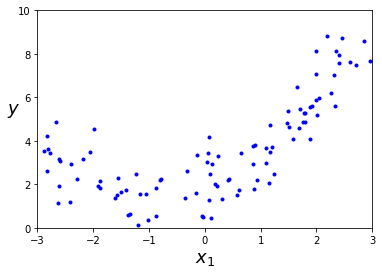

In [71]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [72]:
import pandas as pd
pd.DataFrame(y)

,0
0,7.085920
1,5.288454
2,5.611701
3,3.279081
4,3.632998
...,...
95,2.211921
96,5.179965
97,1.817782
98,0.119109


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [74]:
X_poly

array([[ 1.99064399e+00,  3.96266348e+00],
       [ 1.79842965e+00,  3.23434920e+00],
       [ 1.91292012e+00,  3.65926339e+00],
       [ 2.34495069e-01,  5.49879373e-02],
       [-2.80772127e+00,  7.88329873e+00],
       [ 6.02763778e-01,  3.63324172e-01],
       [ 1.17469575e+00,  1.37991011e+00],
       [ 1.99411975e+00,  3.97651357e+00],
       [ 1.09034810e+00,  1.18885898e+00],
       [-7.81954201e-01,  6.11452372e-01],
       [ 1.88173459e+00,  3.54092505e+00],
       [ 1.26397546e-01,  1.59763396e-02],
       [ 8.91009073e-02,  7.93897168e-03],
       [ 8.61676599e-01,  7.42486561e-01],
       [-2.63550010e+00,  6.94586077e+00],
       [-2.60529018e+00,  6.78753692e+00],
       [-1.49781301e+00,  2.24344380e+00],
       [ 1.14279377e+00,  1.30597759e+00],
       [ 8.65243784e-01,  7.48646806e-01],
       [-1.23022492e+00,  1.51345335e+00],
       [-2.67576319e+00,  7.15970863e+00],
       [-2.05096227e+00,  4.20644625e+00],
       [-1.61586814e+00,  2.61102983e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [75]:
print(X[0])
print(X[0]*X[0])


[1.99064399]
[3.96266348]


In [76]:
X_poly[0]

array([1.99064399, 3.96266348])

Fit the model to this extended training data:

In [77]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.94415593, 0.52370936]]), array([1.91807363]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

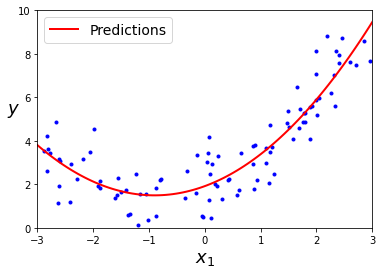

In [78]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [79]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
221,3.410349,51.814720
394,4.119537,56.980989
884,6.013319,33.623890
648,4.992818,33.948027
955,6.851837,28.753978
600,4.794625,43.501171
218,3.406138,48.173608
775,5.454202,37.720622
65,2.502705,44.442539
848,5.756110,37.902433


In [80]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [81]:
len(X)

1000

In [82]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

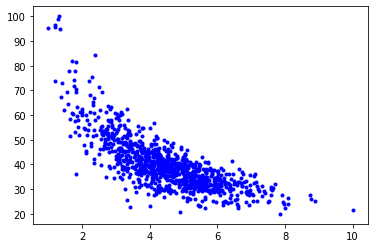

In [83]:
plt.plot(X,y,'b.')

**REGRESIÓN LINEAL**

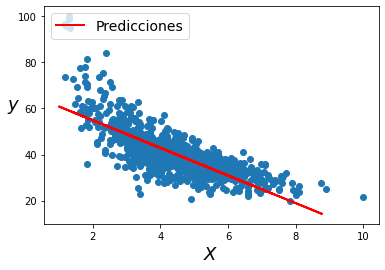

In [84]:
#Defino los conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

#El modelo de regresión lineal sería:
lineal_reg = LinearRegression(fit_intercept=True)
lineal_reg.fit(X_train, y_train)

X_reg = X_test
y_reg = lineal_reg.predict(X_reg)

plt.scatter(X_train, y_train)
plt.plot(X_reg, y_reg, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [85]:
#La ecuación es:

print('La ecuación es: y =', linear_reg.coef_,'x +', linear_reg.intercept_)

La ecuación es: y = [[3.03550692]] x + [3.98336294]


In [86]:
#Los errores MAE y RMSE estarían dados por:
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_reg))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_reg)))
#La R2 sería:
print('R2_Score:', r2_score(y_test,y_reg))

Error Medio Absoluto (MAE): 5.013587781954963
Error Medio Cuadrado (RMSE): 7.108963321847682
R2_Score: 0.6116251549562579


**REGRESIÓN POLINOMIAL**

In [87]:
#polinomial

pol_features = PolynomialFeatures(degree=2, include_bias=False)
#X_train_pol_reg = pol_features.fit_transform(X_train)
#X_test_pol_reg = pol_features.fit_transform(X_test)

X_pol_reg = pol_features.fit_transform(X_train)
X_pol_reg



array([[ 7.97424764, 63.58862541],
       [ 1.89573077,  3.59379517],
       [ 3.5765014 , 12.79136229],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

In [88]:
pol_reg = LinearRegression(fit_intercept=True)
pol_reg.fit(X_pol_reg, y_train)
pol_reg.coef_, pol_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [89]:
X_pol_reg.shape

(900, 2)

In [90]:
X_pol_reg_test = pol_features.fit_transform(X_test)
X_pol_reg_test.shape

(100, 2)

In [91]:
y_pol_reg = pol_reg.predict(X_pol_reg_test)
y_pol_reg.shape

(100,)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


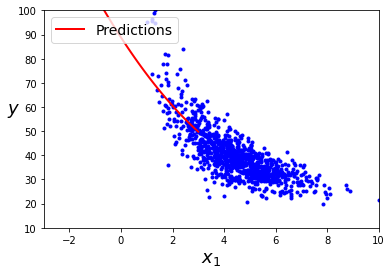

In [92]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = pol_features.transform(X_new)
y_pred = pol_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 10, 10, 100]);

In [93]:
#La ecuación es:

print('La ecuación es: y =', pol_reg.coef_[1],'x^2 +', pol_reg.coef_[0],'x +',pol_reg.intercept_)

La ecuación es: y = 1.1313609537119216 x^2 + -16.406381017212386 x + 88.80179909112496


In [94]:
#Los errores MAE y RMSE estarían dados por:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pol_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pol_reg)))
#La R2 sería:
print('R2_Score',r2_score(y_test, y_pol_reg))

Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068423
R2_Score 0.7385501224942537


**RIDGE**

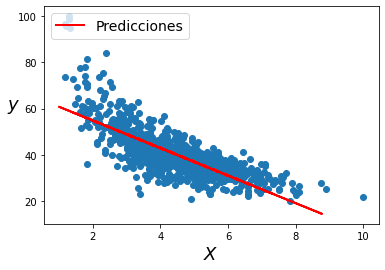

In [95]:
ridge_reg = Ridge(alpha=5.0,fit_intercept=True) 
ridge_reg.fit(X_train, y_train)
X_ridge_reg = X_test  
y_ridge_reg = ridge_reg.predict(X_ridge_reg)
plt.scatter(X_train, y_train)
plt.plot(X_ridge_reg, y_ridge_reg, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [96]:
#Imprimimos los errores y la R2

from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_ridge_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_ridge_reg)))
print('R2_Score',r2_score(y_test, y_ridge_reg))

Error medio Absoluto (MAE): 5.0162057389928325
Root Mean Squared Error: 7.1111119498200965
R2_Score 0.6113903530239646


In [97]:
#La ecuación es:

print('La ecuación es: y =', ridge_reg.coef_,'x +', ridge_reg.intercept_)

La ecuación es: y = [-5.97003397] x + 66.75243237759665


**LASSO**

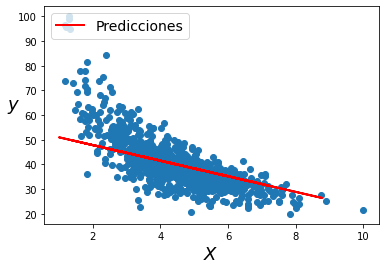

In [98]:
lasso_reg = Lasso(alpha=5.0,fit_intercept=True) 
lasso_reg.fit(X_train, y_train)
X_lasso_reg = X_test  
y_lasso_reg = lasso_reg.predict(X_lasso_reg)
plt.scatter(X_train, y_train)
plt.plot(X_lasso_reg, y_lasso_reg, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [99]:
#Imprimimos los errores y la R2

from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_lasso_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_lasso_reg)))
print('R2_Score',r2_score(y_test, y_lasso_reg))

Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
R2_Score 0.456505036516648


In [100]:
#La ecuación es:

print('La ecuación es: y =', lasso_reg.coef_,'x +', lasso_reg.intercept_)

La ecuación es: y = [-3.15572458] x + 54.16195119377413


**Graficas de todas las regresiones**

In [101]:
#Antes de crear la lista para graficar cada una de las regresiones, se crea la lista de MAE y R2 para cada una de las regresiones contemplatas

lista_mae =[] 
lista_r2 =[]

#Lista MAE y R2 Regresión Lineal (RL)
mae_lineal_reg = metrics.mean_absolute_error(y_test,y_reg)
lista_mae.append(mae_lineal_reg) 

r2_lineal_reg = r2_score(y_test,y_reg)
lista_r2.append(r2_lineal_reg)

#Lista MAE y R2 Regresión Lineal Polinomial (RLP)
mae_lineal_reg = metrics.mean_absolute_error(y_test,y_pol_reg)
lista_mae.append(mae_lineal_reg) 

r2_pol_reg = r2_score(y_test,y_pol_reg)
lista_r2.append(r2_pol_reg)

#Lista MAE y R2 Ridge
mae_ridge_reg = metrics.mean_absolute_error(y_test,y_ridge_reg)
lista_mae.append(mae_ridge_reg) 

r2_ridge_reg = r2_score(y_test,y_ridge_reg)
lista_r2.append(r2_ridge_reg)

#Lista MAE y R2 Lasso
mae_lasso_reg = metrics.mean_absolute_error(y_test,y_lasso_reg)
lista_mae.append(mae_lasso_reg) 

r2_lasso_reg = r2_score(y_test,y_lasso_reg)
lista_r2.append(r2_lasso_reg)


print(lista_mae)
print(lista_r2)

[5.013587781954963, 4.3833025759681075, 5.0162057389928325, 5.681207654677401]
[0.6116251549562579, 0.7385501224942537, 0.6113903530239646, 0.456505036516648]


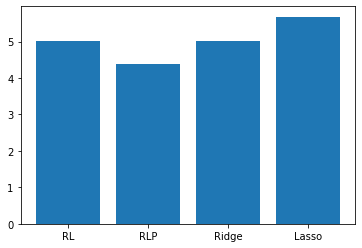

In [102]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_mae)
plt.show()

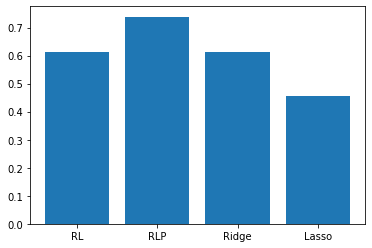

In [103]:
#Grafico de r cuadrada
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres,lista_r2)
plt.show()

**Conclusiones:**

Luego de realizar todos los modelos, se puede concluir que los errores MAE para el de Regresión Lineal y Ridge dieron valores muy similares, del mismo modo se obtuvo para R2, pero si revisamos la Regresión Lineal Polinomial el MAE estuvo por debajo y el R2 por encima a los mencionados inicialmente. Por su parte los errores cuando se aplicó la regresión Lasso, devolvieron valores fuera del rango. Esto lo podemos explicar porque al parecer el conjunto de datos obedece más a un polinomio lineal y en ese sentido RL y Ridge deben mostrarnos un mejor comportamiento.

Tendríamos que seguir haciendo iteraciones e incluso sacar una gráfica box-plot para ver el comportamiento estadístico del residuo ya que de este dependería el ajuste que habría que hacer a los modelos.

Mi conjunto de entrenamiento fue del 90% y podríamos ajustarlo bajando a 80%. Sin embargo, si en este punto fuese necesario brindar un avance a la empresa o entregar un informe preliminar, recomendaría el uso de RL y Ridge para comparar y corregir desviaciones importantes.